## 1. Le choix du degré du polynôme en utilisant la validation croisée


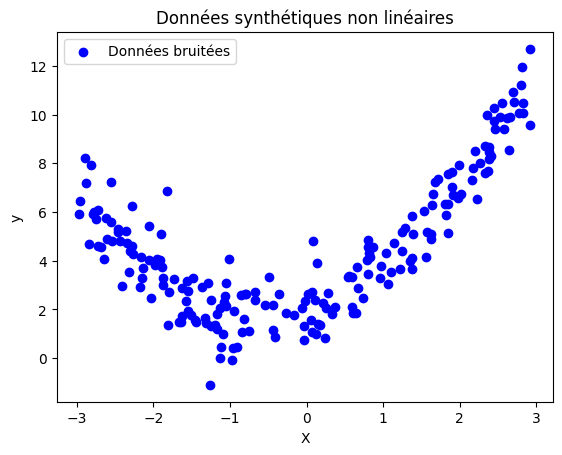

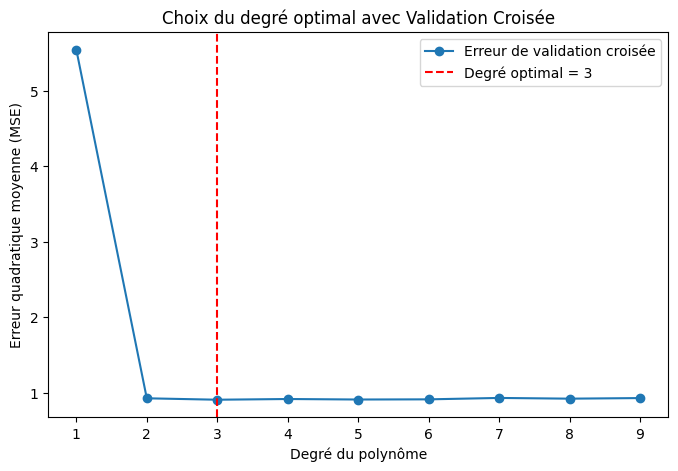

Degré optimal sélectionné : 3


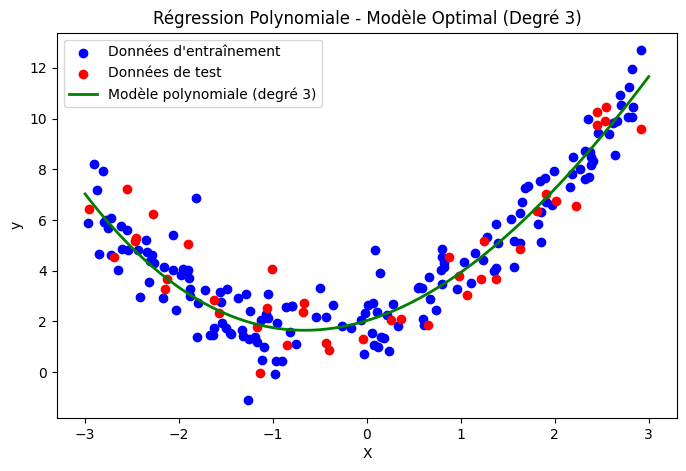

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

# Données synthétiques
np.random.seed(42)
X=6*np.random.rand(200, 1)-3
y = 0.8 *X**2 + 0.9*X+2+np.random.randn(200, 1)

# Affichage
plt.scatter(X, y, color='blue', label='Données bruitées')
plt.title("Données synthétiques non linéaires")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Séparation des données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tester plusieurs degrés sur les données d'entraînement uniquement
degrees = range(1, 10)
cv_errors = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)

    model = LinearRegression()

    # Validation croisée sur l'ensemble d'entraînement
    scores = cross_val_score(model, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_errors.append(-np.mean(scores))

# Trouver le degré optimal selon la validation croisée
optimal_degree = degrees[np.argmin(cv_errors)]

# Affichage des erreurs de validation croisée
plt.figure(figsize=(8, 5))
plt.plot(degrees, cv_errors, marker='o', label="Erreur de validation croisée")
plt.axvline(optimal_degree, color='red', linestyle='--', label=f"Degré optimal = {optimal_degree}")
plt.xlabel("Degré du polynôme")
plt.ylabel("Erreur quadratique moyenne (MSE)")
plt.title("Choix du degré optimal avec Validation Croisée")
plt.legend()
plt.show()

print(f"Degré optimal sélectionné : {optimal_degree}")

# Entraînement du modèle final avec le degré optimal
poly = PolynomialFeatures(degree=optimal_degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# Génération de prédictions pour affichage
X_range = np.linspace(-3, 3, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_pred = model.predict(X_range_poly)

# Tracé du modèle optimal trouvé par validation croisée
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', label="Données d'entraînement")
plt.scatter(X_test, y_test, color='red', label="Données de test")
plt.plot(X_range, y_pred, color='green', linewidth=2, label=f"Modèle polynomiale (degré {optimal_degree})")
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"Régression Polynomiale - Modèle Optimal (Degré {optimal_degree})")
plt.legend()
plt.show()


## 2. Le choix du degré du polynôme en utilisant le BIC

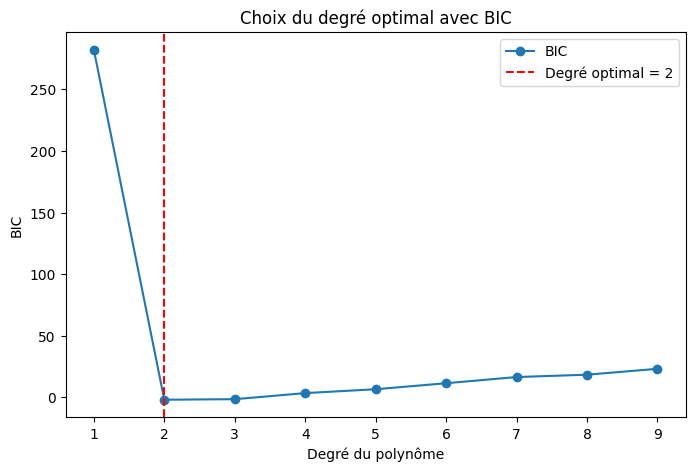

Degré optimal selon le BIC : 2
Erreur quadratique moyenne sur le test (MSE) : 1.0723968630048415


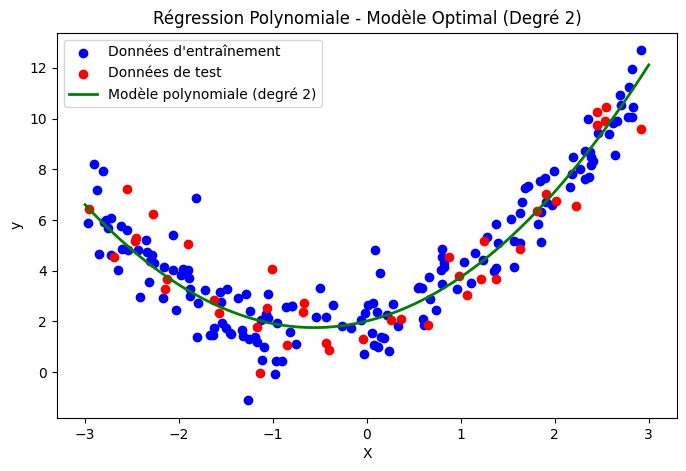

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Génération de données synthétiques
np.random.seed(42)
X=6*np.random.rand(200, 1)-3
y = 0.8 *X**2 + 0.9*X+2+np.random.randn(200, 1)

# Séparation des données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tester plusieurs degrés sur l'ensemble d'entraînement uniquement
degrees = range(1, 10)
bic_values = []

n_train = len(y_train)  # Nombre d'observations dans l'ensemble d'entraînement

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Prédictions et erreur quadratique moyenne sur l'ensemble d'entraînement
    y_train_pred = model.predict(X_train_poly)
    mse = mean_squared_error(y_train, y_train_pred)

    # Calcul du BIC sur l'ensemble d'entraînement
    k = X_train_poly.shape[1]  # Nombre de paramètres (termes polynomiaux)
    bic = n_train * np.log(mse) + k * np.log(n_train)
    bic_values.append(bic)

# Trouver le degré optimal selon le BIC
optimal_degree_bic = degrees[np.argmin(bic_values)]

# Affichage des valeurs de BIC
plt.figure(figsize=(8, 5))
plt.plot(degrees, bic_values, marker='o', label="BIC")
plt.axvline(optimal_degree_bic, color='red', linestyle='--', label=f"Degré optimal = {optimal_degree_bic}")
plt.xlabel("Degré du polynôme")
plt.ylabel("BIC")
plt.title("Choix du degré optimal avec BIC")
plt.legend()
plt.show()

print(f"Degré optimal selon le BIC : {optimal_degree_bic}")

# Entraînement du modèle final avec le degré optimal sur l'ensemble d'entraînement
poly = PolynomialFeatures(degree=optimal_degree_bic)

#Pour créer la base polynomiale à partir des données d’entraînement
X_train_poly = poly.fit_transform(X_train)

#Pour appliquer la même transformation aux données de test
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# Évaluation sur l'ensemble de test
y_test_pred = model.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Erreur quadratique moyenne sur le test (MSE) : {test_mse}")

# Génération de prédictions pour affichage
X_range = np.linspace(-3, 3, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_pred = model.predict(X_range_poly)

# Tracé du modèle optimal trouvé par BIC
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', label="Données d'entraînement")
plt.scatter(X_test, y_test, color='red', label="Données de test")
plt.plot(X_range, y_pred, color='green', linewidth=2, label=f"Modèle polynomiale (degré {optimal_degree_bic})")
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"Régression Polynomiale - Modèle Optimal (Degré {optimal_degree_bic})")
plt.legend()
plt.show()


## 3. La séléction du degré optimal d'une régression polynomiale en minimisant l'erreur de test.

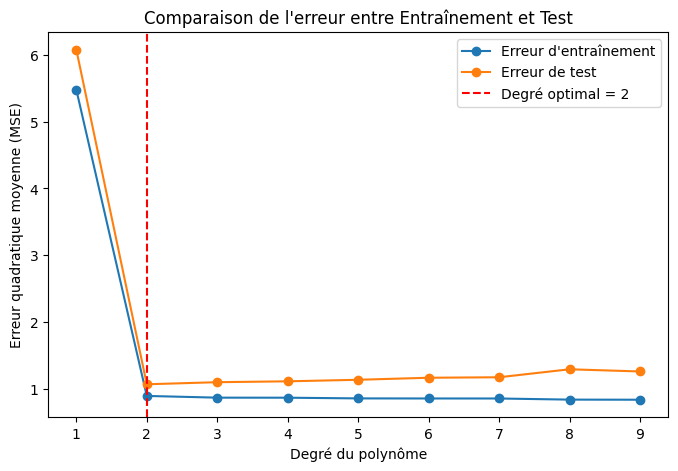

Degré optimal sélectionné selon l'erreur de test : 2


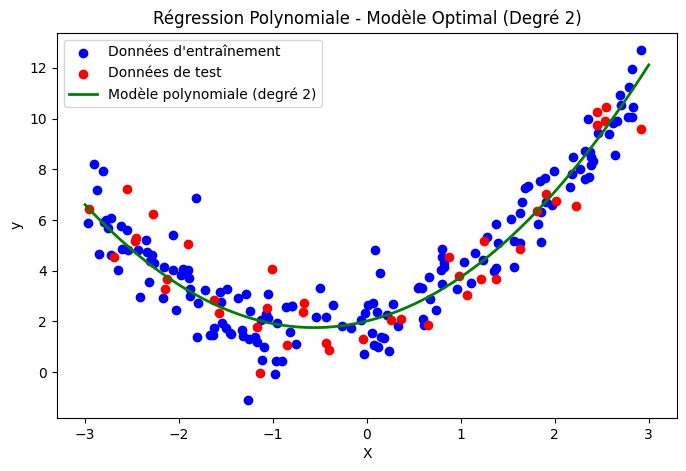

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Génération de données synthétiques
np.random.seed(42)
X=6*np.random.rand(200, 1)-3
y = 0.8 *X**2 + 0.9*X+2+np.random.randn(200, 1)

# Séparation des données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tester plusieurs degrés de polynôme
degrees = range(1, 10)
train_errors = []
test_errors = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Prédictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calcul de l'erreur quadratique moyenne (MSE)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Trouver le degré optimal selon l'erreur de test minimale
optimal_degree_test = degrees[np.argmin(test_errors)]

# Affichage des erreurs en fonction du degré du polynôme
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_errors, label="Erreur d'entraînement", marker='o')
plt.plot(degrees, test_errors, label="Erreur de test", marker='o')
plt.axvline(optimal_degree_test, color='red', linestyle='--', label=f"Degré optimal = {optimal_degree_test}")
plt.xlabel("Degré du polynôme")
plt.ylabel("Erreur quadratique moyenne (MSE)")
plt.title("Comparaison de l'erreur entre Entraînement et Test")
plt.legend()
plt.show()

print(f"Degré optimal sélectionné selon l'erreur de test : {optimal_degree_test}")

# Entraînement du modèle final avec le degré optimal
poly = PolynomialFeatures(degree=optimal_degree_test)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# Génération de prédictions pour affichage
X_range = np.linspace(-3, 3, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_pred = model.predict(X_range_poly)

# Tracé du modèle optimal trouvé par l'erreur de test
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', label="Données d'entraînement")
plt.scatter(X_test, y_test, color='red', label="Données de test")

plt.plot(X_range, y_pred, color='green', linewidth=2, label=f"Modèle polynomiale (degré {optimal_degree_test})")
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"Régression Polynomiale - Modèle Optimal (Degré {optimal_degree_test})")
plt.legend()
plt.show()


## Modèle de régression polynomiale from scratch avec le degré 2 .

In [13]:
# Séparation des données en jeu d'entraînement et de test
np.random.seed(42)
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200,1)

In [14]:
# Verification des dimensions
print(X.shape)
print(y.shape)

(200, 1)
(200, 1)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Verification des dimensions
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 1)
(160, 1)
(40, 1)
(40, 1)


In [18]:
#Création de la matrice X_train et X_test, inclut le Biais
X_train_p = np.hstack((X_train, np.ones(X_train.shape)))
X_train_p = np.hstack((X_train**2, X_train_p)) # ajoute le vecteur x^2 a la gauche de la matrice X

X_test_p = np.hstack((X_test, np.ones(X_test.shape)))
X_test_p = np.hstack((X_test**2, X_test_p)) # ajoute le vecteur x^2 a la gauche de la matrice X


In [19]:
print(X_train_p.shape)
print(X_train_p[:10])

(160, 3)
[[ 5.31203686 -2.30478564  1.        ]
 [ 5.67707611  2.38266156  1.        ]
 [ 1.22190509  1.10539816  1.        ]
 [ 0.06947447 -0.26358009  1.        ]
 [ 1.19241846 -1.09197915  1.        ]
 [ 0.81855909 -0.90474255  1.        ]
 [ 7.40546021 -2.72129752  1.        ]
 [ 1.56906979 -1.25262516  1.        ]
 [ 1.42738011 -1.19473014  1.        ]
 [ 1.8978839   1.37763707  1.        ]]


In [20]:
print(X_test_p.shape)
print(X_test_p[:10])

(40, 3)
[[ 1.38580648e-03 -3.72264218e-02  1.00000000e+00]
 [ 3.60837736e+00 -1.89957294e+00  1.00000000e+00]
 [ 4.16372226e-01  6.45269111e-01  1.00000000e+00]
 [ 2.47802610e+00 -1.57417474e+00  1.00000000e+00]
 [ 8.75146326e+00 -2.95828722e+00  1.00000000e+00]
 [ 4.96738692e+00  2.22876354e+00  1.00000000e+00]
 [ 8.53412001e+00  2.92132162e+00  1.00000000e+00]
 [ 1.13504769e+00  1.06538617e+00  1.00000000e+00]
 [ 7.58705007e-01  8.71036742e-01  1.00000000e+00]
 [ 9.50885745e-01  9.75133706e-01  1.00000000e+00]]


In [21]:
# Initialisation du vecteur theta aléatoire, avec 3 éléments (car X a trois colonnes)
theta = np.random.randn(3, 1)
theta

array([[ 0.85765962],
       [-0.15993853],
       [-0.01901621]])

### 1 Modele lineaire

In [22]:
def model(X, theta):
    return X.dot(theta)

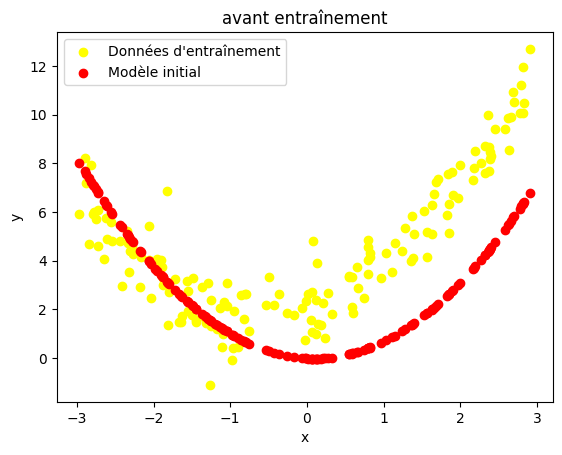

In [51]:
plt.scatter(X_train, y_train, label='Données d\'entraînement', color='yellow')
plt.scatter(X_train, model(X_train_p, theta), c='r', label='Modèle initial')
plt.xlabel('x')
plt.ylabel('y')
plt.title("avant entraînement")
plt.legend()
plt.show()

### 2 Fonction cout

In [33]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [34]:
print(f"Coût initial: {cost_function(X_train_p, y_train, theta)}")

Coût initial: 3.8677632483082998


### 3 Gradients et Descente de Gradient

In [35]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [36]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Coût du modèle

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise à jour du paramètre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Coût au tour i dans cost_history[i]

    return theta, cost_history

### 4 Entrainement

In [37]:
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X_train_p, y_train, theta, learning_rate, n_iterations)

print("Theta final:",theta_final)

Theta final: [[0.82269914]
 [0.91775076]
 [1.98150891]]


In [38]:
print(f"Coût final: {cost_function(X_train_p, y_train, theta_final)}")

Coût final: 0.44929623978708505


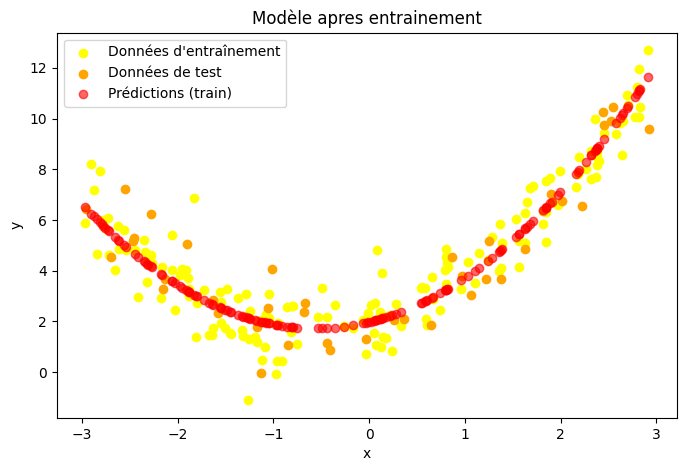

In [50]:
# Prédictions sur l'ensemble d'entraînement et de test
predictions_train = model(X_train_p, theta_final)
predictions_test = model(X_test_p, theta_final)

# Affiche les résultats de prédictions par rapport à notre Dataset
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='yellow', label="Données d'entraînement")
plt.scatter(X_test, y_test, color='orange', label="Données de test")
plt.scatter(X_train, predictions_train, c='red', alpha=0.6, label='Prédictions (train)')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Modèle apres entrainement")
plt.legend()
plt.show()

### 5 Courbe d'apprentissage

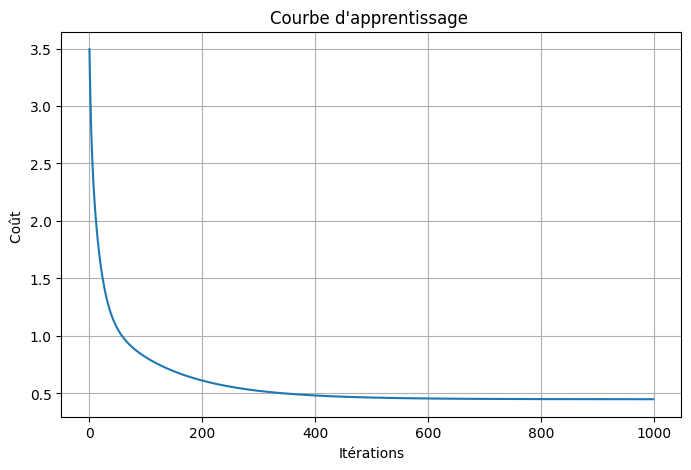

In [53]:
plt.figure(figsize=(8, 5))
plt.plot(range(n_iterations), cost_history)
plt.xlabel("Itérations")
plt.ylabel("Coût ")
plt.title("Courbe d'apprentissage ")
plt.grid(True)
plt.show()

### 6 Evaluation du modele- Coefficient de determination

In [54]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [58]:
#Calcul du R^2
coef_determination(y_test, predictions_test)

np.float64(0.8596993592888568)